In [1]:
import os
import numpy as np
import mne
from matplotlib import pyplot as plt
from matplotlib.pyplot import MultipleLocator
import pandas as pd
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
from copy import deepcopy
from mne.preprocessing import create_ecg_epochs, create_eog_epochs, read_ica
import sys
from langouEEG import *
from tensorpac import Pac, EventRelatedPac, PreferredPhase
from tensorpac.utils import PeakLockedTF, PSD, ITC, BinAmplitude
import pickle
dataRoot = '/data/home/viscent/Light'

In [ ]:
subject_name='S03'
print(subject_name)
raw,picks,picks_str = initData(subject_name)
initLayout(raw)
events, event_dict=extractEvents(raw)
filterRaw(raw, picks, ref_set_average=False, ref_channels=['M1', 'M2'])
runICA(raw)
epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochs(raw,events,picks)
epochs = epoch_RR,epoch_RF,epoch_4R,epoch_4F

In [ ]:
epoch_4F_raw=epoch_4F.to_data_frame()
epoch_4F_np=epoch_4F_raw.values[:,3:6].flatten()

In [ ]:
for i in range(64):
    epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochs(raw,events,i)
    epoch_4F_raw=epoch_4F.to_data_frame()
    epoch_4F_np=epoch_4F_raw.values[:,3:6].flatten()
    epochs_4F=[]
    epochs=[]
    epochs_4F.append(epoch_4F_np)
    epochs.append([epoch_RR,epoch_RF,epoch_4R,epoch_4F])

In [ ]:
sf = 500
p_obj = Pac(idpac=(6, 0, 0), f_pha=np.arange(4,8,0.1), f_amp=np.arange(30,50))
pha_p = p_obj.filter(sf, epoch_4F_np, ftype='phase')
amp_p = p_obj.filter(sf, epoch_4F_np, ftype='amplitude')
time_exec = slice(5000, 6000)
pha_exec, amp_exec = pha_p[..., time_exec], amp_p[..., time_exec]
pac_exec = p_obj.fit(pha_exec, amp_exec).mean(-1)

In [2]:
maxMIs = np.zeros((15,64,64))
normMIs = np.zeros((15,64,64))
meanMIs = np.zeros(15)
refMIs = np.zeros(15)
for i in range(15):
    try:
        if i+1<10:
            subject_name='S0'+str(i+1)
        else:
            subject_name='S'+str(i+1)
        file = dataRoot+'/'+subject_name + "_pac.lgeeg"
        with open(file,'rb') as f:
            p_objs = pickle.load(f)
        file = dataRoot+'/'+subject_name + "_pexe.lgeeg"
        with open(file,'rb') as f:
            pac_execs = pickle.load(f)
    except:
        continue
    for j in range(64):
        for k in range(64):
            maxMIs[i][j][k] = pac_execs[64*j+k].max()
    meanMIs = np.mean(maxMIs[i])
    refMIs[i] = pac_execs[64*42+42].max()
    normMIs[i] = (maxMIs[i] - refMIs[i]) / np.std(maxMIs[i])

    
    

In [ ]:
pac_execs[1].max()

In [ ]:
np.savetxt('maxMIs_mean.csv',np.mean(maxMIs,axis=0), delimiter=",")

np.savetxt('maxMIs_mean_norm.csv',np.mean(normMIs,axis=0), delimiter=",")

In [20]:
from mne.viz import plot_topomap
import matplotlib
raw = mne.io.read_raw_cnt('/data/home/viscent/Light/Light/S01 Data.cnt')
matplotlib.use('Agg')
for i in range(64):
    fig = plt.figure()
    mask = np.full((64),False)
    mask[i]=True
    plot_topomap(np.pad(np.mean(normMIs,axis=0)[i,:],(0,2),'constant'),raw.info,mask=mask)
    fig.savefig(os.path.join(dataRoot,'Light','PACfig','pha',str(i)+'.png'))
    fig.clf()
for i in range(64):
    fig = plt.figure()
    mask = np.full((64),False)
    mask[i]=True
    plot_topomap(np.pad(np.mean(normMIs,axis=0)[:,i],(0,2),'constant'),raw.info,mask=mask)
    fig.savefig(os.path.join(dataRoot,'Light','PACfig','amp',str(i)+'.png'))
    fig.clf()   

<ipython-input-20-e04306934471>:3: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt('/data/home/viscent/Light/Light/S01 Data.cnt')
<ipython-input-20-e04306934471>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<ipython-input-13-2af5a4f35b8c>:2: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt('/data/home/viscent/Light/Light/S01 Data.cnt')


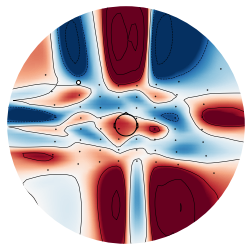

In [13]:
from mne.viz import plot_topomap
raw = mne.io.read_raw_cnt('/data/home/viscent/Light/Light/S01 Data.cnt')
fig = plt.figure()
mask = np.full((64),False)
mask[1]=True
plot_topomap(np.pad(np.mean(normMIs,axis=0)[i],(0,2),'constant'),raw.info,mask=mask)
# fig.savefig(os.path.join(dataRoot,'Light','PACfig',str(1)+'-phase.png'))
fig.clf()

In [10]:
mne.channels.read_layout('/data/home/viscent/Light/Light/S01 Data.cnt')

ValueError: Unknown layout type. Should be of type .lout or .lay.

In [8]:
mon.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
vmax = pac_exec.max()
kw = dict(vmax=vmax, vmin=.04, cmap='viridis')
plt.figure(figsize=(14, 4))
p_obj.comodulogram(pac_exec, title="PAC Execution [1.5, 3]s", **kw)
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
epoch_4F_np.shape